In [1]:
import matplotlib.pyplot as plt
import numpy as np

from simulation import run_simulation
from histograms import PairDens
from histograms import g_theoretical
#%load_ext autoreload
#%autoreload 2

In [2]:
n = 2000 # Starting plankton population size.
iters = 1000 # Time steps.
L_max = 1.0 # Size of square domain.
#L_max = np.sqrt(10)

plankton, _ = run_simulation(n, iters, L_max, True, 10**(-7))
print(len(plankton))

2020


In [3]:
pow_min = -8.0 # To reproduce the image, choose -8.0
pow_max = -2.0 # To reproduce the image, choose -2.0
dp = 0.25

r_list, pcf_dx_list, pcf_dp_list = PairDens(pow_min, pow_max, dp, L_max, plankton)

In [4]:
# We scale the radii to have r/delta
radii = [i* 10**7 for i in r_list]

C_0 = n/1
gamma = 0.0264
g_test = g_theoretical(gamma, radii, C_0)-1

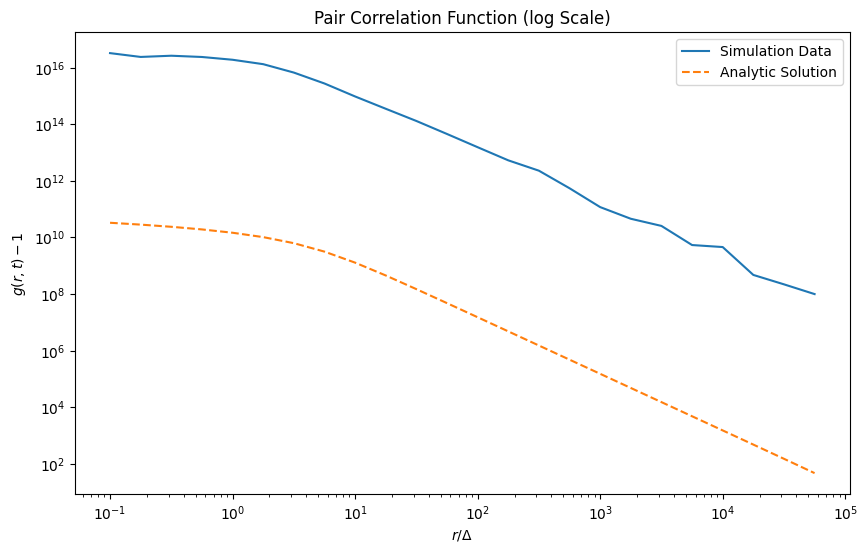

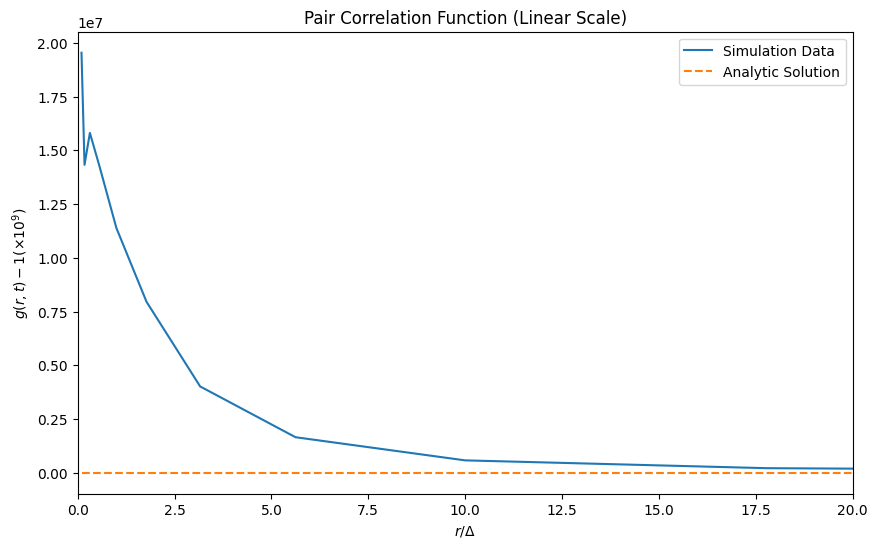

In [5]:
# Subtract 1 from pcf_dx_list for y-axis
plot_pcf_dx_list = np.array(pcf_dx_list) - 1
plot_pcf_dp_list = (np.array(pcf_dp_list) - 1) / 10**9

plt.figure(figsize=(10, 6))
plt.loglog(radii, plot_pcf_dx_list, label='Simulation Data')
plt.loglog(radii, g_test, '--', label='Analytic Solution')

#plt.xlim(left=10**(2.3))

plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.title('Pair Correlation Function (log Scale)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(radii, plot_pcf_dp_list, label='Simulation Data')
plt.plot(radii, g_test/10**9, '--', label='Analytic Solution')
plt.xlim(0, 20)
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1 (\times 10^{9})$')
plt.title('Pair Correlation Function (Linear Scale)')
plt.legend()
plt.show()